<a href="https://colab.research.google.com/github/anhtruong1209/Deep-Learning/blob/master/hourse_or_humans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
cd /content/gdrive/MyDrive/Colab Notebooks/Horse_Or_Human

/content/gdrive/MyDrive/Colab Notebooks/Horse_Or_Human


In [ ]:
ls

'download (1) (1).jfif'   download.jfif
'download (1).jfif'       Hinh-nen-may-tinh-con-ngua-dep-nhat-1024x682.jpg
'download (2).jfif'       horse-or-human/
'download (3).jfif'       hourse_or_humans.ipynb


In [ ]:
# !wget --no-check-certificate \
#     https://www.kaggle.com/sanikamal/horses-or-humans-dataset/download \
#     -O ./horse-or-human.zip

In [ ]:
train_folder = "./horse-or-human/train"
validation_folder = "./horse-or-human/validation" 

In [ ]:
# !unzip -q archive.zip -d $train_folder

In [ ]:
ls

'download (1) (1).jfif'   download.jfif
'download (1).jfif'       Hinh-nen-may-tinh-con-ngua-dep-nhat-1024x682.jpg
'download (2).jfif'       horse-or-human/
'download (3).jfif'       hourse_or_humans.ipynb


In [ ]:
train_horse_dir = 'horse-or-human/train/horses'
train_human_dir = 'horse-or-human/train/humans'
validation_horse_dir = 'horse-or-human/validation/horses'
validation_human_dir = 'horse-or-human/validation/humans'

In [ ]:
import tensorflow as tf


In [ ]:
tf.__version__

'2.5.0'

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu', input_shape = (150,150,3)),                   
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
 summary_model = model.summary()
 summary_model

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.001),metrics=['acc'])

In [ ]:
#data processing
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
train_generator = ImageDataGenerator(rescale=1/255)
valid_generator = ImageDataGenerator(rescale=1/255)


In [ ]:
generated_train_data = train_generator.flow_from_directory(
    train_folder,
    target_size = (150,150),
    batch_size = 64,
    class_mode = 'binary'    
)

Found 1027 images belonging to 2 classes.


In [ ]:
generated_valid_data = valid_generator.flow_from_directory(
    validation_folder,
    target_size = (150,150),
    batch_size = 64,
    class_mode = 'binary'    
)

Found 256 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
    generated_train_data,
    steps_per_epoch =8,
    epochs=15,
    verbose=1,
    validation_data = generated_valid_data,
    validation_steps = 8
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
17/17 [==============================] - 7s 379ms/step - loss: 1.5918e-05 - acc: 1.0000
Epoch 2/10
17/17 [==============================] - 7s 380ms/step - loss: 5.3640e-06 - acc: 1.0000
Epoch 3/10
17/17 [==============================] - 6s 378ms/step - loss: 2.4840e-06 - acc: 1.0000
Epoch 4/10
17/17 [==============================] - 6s 376ms/step - loss: 1.0404e-06 - acc: 1.0000
Epoch 5/10
17/17 [==============================] - 7s 379ms/step - loss: 5.3520e-07 - acc: 1.0000
Epoch 6/10
17/17 [==============================] - 7s 379ms/step - loss: 3.5803 - acc: 0.9601
Epoch 7/10
17/17 [==============================] - 6s 377ms/step - loss: 2.9582e-04 - acc: 1.0000
Epoch 8/10
17/17 [==============================] - 6s 378ms/step - loss: 1.4502e-04 - acc: 1.0000
Epoch 9/10
17/17 [==============================] - 7s 389ms/step - loss: 6.5262e-05 - acc: 1.0000
Epoch 10/10
17/17 [==============================] - 57s 4s/step - loss: 2.9587e-05 - acc: 1.0000


In [ ]:
model.save("humanorhorse.h5")

In [ ]:
saved_model = tf.keras.models.load_model("humanorhorse.h5")

Saving 163930750_1139358013183435_2087627274252460434_n.jpg to 163930750_1139358013183435_2087627274252460434_n.jpg
(1, 150, 150, 3)
[9.53492e-06]
163930750_1139358013183435_2087627274252460434_n.jpg is a horse


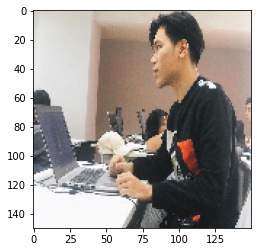

In [ ]:
import numpy as np 
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt

uploaded = files.upload()

for fn in uploaded.keys():
    path = "./" + fn 
    img= image.load_img(path , target_size=(150,150))
    x = image.img_to_array(img) / 255
    x = np.expand_dims(x,axis=0)
    images = np.vstack([x])
    plt.imshow(images.reshape(150,150,3))
    print(images.shape)

    classes = saved_model.predict(images, batch_size=64)
    print(classes[0])
    if classes[0] >= 0.5:
        print(fn+" is human")
    else:
        print(fn+" is a horse")   